In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plot_utils import adjust_spines

### Load observed data

In [2]:
M1_25degree = pickle.load(open("data/M1_features.pickle", "rb"))
ephys_features = np.array(M1_25degree["X_o"].columns)[:-4]
Xo = M1_25degree["X_o"].copy()
feature_list = range(23)

In [3]:
prop = pd.read_csv("data/m1_patchseq_meta_data.csv", sep="\t")
prop = prop.rename(columns={"Targeted layer": "Layer"})
prop = prop[["Cell", "Layer", "Cre", "RNA type"]]
prop = prop.set_index("Cell")
prop = prop.reindex(Xo.index)
no_low_qual = np.array(list(map(str, prop["RNA type"].values))) != "nan"
prop = prop.loc[no_low_qual, :]
Xo = Xo.loc[no_low_qual, :]
celltypes = prop["RNA type"]

In [4]:
annotations = pd.read_csv("data/cluster.annotation.csv", index_col=0)
cellTypeColors = {}
for celltype in np.unique(annotations["cluster_label"].values):
    cellTypeColors.update(
        {
            celltype: annotations.iloc[
                np.where(annotations["cluster_label"] == celltype)[0][0], :
            ]["cluster_color"]
        }
    )
colors = np.array([cellTypeColors[celltype] for celltype in celltypes])

In [5]:
# Vip
celltype_Vip = (
    (celltypes == "Vip C1ql1")
    | (celltypes == "Vip Chat_1")
    | (celltypes == "Vip Gpc3")
    | (celltypes == "Vip Htr1f")
    | (celltypes == "Vip Mybpc1_1")
    | (celltypes == "Vip Mybpc1_2")
    | (celltypes == "Vip Mybpc1_3")
    | (celltypes == "Vip Serpinf1_1")
    | (celltypes == "Vip Serpinf1_2")
    | (celltypes == "Vip Serpinf1_3")
    | (celltypes == "Vip Sncg")
)

# Sst
celltype_Sst = (
    (celltypes == "Sst C1ql3_1")
    | (celltypes == "Sst C1ql3_2")
    | (celltypes == "Sst Calb2")
    | (celltypes == "Sst Chodl")
    | (celltypes == "Sst Crhr2_1")
    | (celltypes == "Sst Crhr2_2")
    | (celltypes == "Sst Etv1")
    | (celltypes == "Sst Hpse")
    | (celltypes == "Sst Htr1a")
    | (celltypes == "Sst Myh8_1")
    | (celltypes == "Sst Myh8_2")
    | (celltypes == "Sst Myh8_3")
    | (celltypes == "Sst Penk")
    | (celltypes == "Sst Pvalb Calb2")
    | (celltypes == "Sst Pvalb Etv1")
    | (celltypes == "Sst Tac2")
    | (celltypes == "Sst Th_1")
    | (celltypes == "Sst Th_3")
)

# Lamp5
celltype_Lamp5 = (
    (celltypes == "Lamp5 Egln3_1")
    | (celltypes == "Lamp5 Egln3_2")
    | (celltypes == "Lamp5 Lhx6")
    | (celltypes == "Lamp5 Pax6")
    | (celltypes == "Lamp5 Pdlim5_1")
    | (celltypes == "Lamp5 Pdlim5_2")
    | (celltypes == "Lamp5 Slc35d3")
)

# Pvalb
celltype_Pvalb = (
    (celltypes == "Pvalb Calb1_1")
    | (celltypes == "Pvalb Calb1_2")
    | (celltypes == "Pvalb Egfem1")
    | (celltypes == "Pvalb Gabrg1")
    | (celltypes == "Pvalb Gpr149")
    | (celltypes == "Pvalb Il1rapl2")
    | (celltypes == "Pvalb Kank4")
    | (celltypes == "Pvalb Reln")
    | (celltypes == "Pvalb Vipr2_2")
)

# Pyramidal
celltype_Pyr = (
    (celltypes == "L2/3 IT_3")
    | (celltypes == "L4/5 IT_1")
    | (celltypes == "L4/5 IT_2")
    | (celltypes == "L5 ET_1")
    | (celltypes == "L5 ET_2")
    | (celltypes == "L5 ET_3")
    | (celltypes == "L5 ET_4")
    | (celltypes == "L5 IT_1")
    | (celltypes == "L5 IT_2")
    | (celltypes == "L5 IT_3")
    | (celltypes == "L5 IT_4")
    | (celltypes == "L5/6 NP CT")
    | (celltypes == "L5/6 NP_1")
    | (celltypes == "L5/6 NP_2")
    | (celltypes == "L6 CT Cpa6")
    | (celltypes == "L6 CT Grp")
    | (celltypes == "L6 CT Pou3f2")
    | (celltypes == "L6 IT_1")
    | (celltypes == "L6 IT_2")
    | (celltypes == "L6b Col6a1")
    | (celltypes == "L6b Kcnip1")
    | (celltypes == "L6b Ror1")
    | (celltypes == "L6b Shisa6_1")
    | (celltypes == "L6b Shisa6_2")
)
# Sncg
celltype_Sncg = (
    (celltypes == "Sncg Calb1_2")
    | (celltypes == "Sncg Npy2r")
    | (celltypes == "Sncg Calb1_1")
    | (celltypes == "Sncg Col14a1")
)

In [6]:
Xo

,AP threshold,AP amplitude,AP width,AHP,3rd AP threshold,3rd AP amplitude,3rd AP width,3rd AHP,AP count,AP count 1st 8th,...,ISI CV,latency,rest $V_{m}$ mean,$V_{m}$ mean,$V_{m}$ std,$V_{m}$ skewness,Vi,1-comp area,R_input,tau
cell id,,,,,,,,,,,,,,,,,,,,,
20190418_sample_8,-58.351621,76.058190,0.80,-6.186172,-48.654582,59.153114,0.84,-13.776202,3.784190,2.197225,...,-2.375144,0.970779,-78.395460,-50.947560,193.539314,2.893263,-78.926407,488.503122,186.342199,0.910287
20190418_sample_5,-54.743048,92.948910,2.32,10.885356,-36.477409,48.268432,4.96,-2.014672,2.772589,1.791759,...,-1.220111,1.472472,-79.374609,-39.309321,266.845980,2.420717,-81.652969,643.034147,243.795551,1.567689
20190418_sample_2,-50.611403,76.264057,1.40,-5.597327,-38.860969,43.194041,2.04,-9.111572,2.079442,2.079442,...,-1.773187,1.057790,-76.148038,-33.792001,46.843200,1.697684,-77.498745,304.764562,329.739791,1.004930
20190418_sample_9,-54.258905,103.987038,1.92,11.428908,-35.036411,56.167506,2.96,-2.832884,3.091042,1.945910,...,-1.600690,1.922788,-83.796163,-30.079619,205.671070,1.907002,-88.939615,895.597871,289.272419,2.590718
20190418_sample_10,-49.691711,91.925863,1.52,-4.834145,-35.067843,51.103311,1.76,-8.606639,2.890372,1.791759,...,-1.431359,1.934416,-85.955350,-37.927538,111.080152,2.946604,-88.104941,988.326652,321.246431,3.174964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20200106_sample_1,-50.120790,71.778428,1.16,-4.276332,-40.072732,42.635692,2.04,-10.632437,2.944439,1.945910,...,-1.065157,1.962908,-78.582381,-45.480072,131.544287,3.167725,-79.124734,1065.449347,272.345385,2.901702
20200106_sample_5,-45.211889,91.272198,1.16,-0.675235,-37.472135,83.423840,1.36,-5.802974,2.484907,1.609438,...,-1.494626,2.967333,-71.020771,-41.747111,123.898218,5.657296,-72.378505,8547.879279,110.563555,9.450839
20190704_sample_12,-48.158880,86.425547,1.04,-1.319963,-26.116159,26.218272,1.36,-14.701048,2.302585,2.079442,...,-0.961530,1.568616,-93.045710,-31.872964,43.939352,0.767009,-96.440621,888.498343,235.303044,2.090664


In [8]:
celltype_Pyr

cell id
20190418_sample_8     False
20190418_sample_5      True
20190418_sample_2     False
20190418_sample_9      True
20190418_sample_10     True
                      ...  
20200106_sample_1     False
20200106_sample_5      True
20190704_sample_12    False
20190704_sample_14    False
20190718_sample_2      True
Name: RNA type, Length: 955, dtype: bool

In [9]:
Xo.columns

Index(['AP threshold', 'AP amplitude', 'AP width', 'AHP', '3rd AP threshold',
       '3rd AP amplitude', '3rd AP width', '3rd AHP', 'AP count',
       'AP count 1st 8th', 'AP count 1st quarter', 'AP count 1st half',
       'AP count 2nd half', 'AP amp adapt', 'AP average amp adapt', 'AP CV',
       'ISI adapt', 'ISI CV', 'latency', 'rest $V_{m}$ mean', '$V_{m}$ mean',
       '$V_{m}$ std', '$V_{m}$ skewness', 'Vi', '1-comp area', 'R_input',
       'tau'],
      dtype='object')

In [14]:
Xo['celltypes']=celltypes

In [29]:
features_to_show=['AP width', 'ISI CV', 'AP count', 'rest $V_{m}$ mean', 'latency']

In [32]:
for i, ttype in enumerate(ttypes):
    m = np.median(Xo['AP width'][Xo['celltypes']==ttype])
    print(m)
    print(cellTypeColors[ttype])

1.1200000000000099
#DDACC9
1.0799999999999976
#FF88AD
1.0799999999999976
#DD8091
0.9600000000000025
#FF7290
1.0800000000000045
#FF8C97
1.1600000000000081
#FFA388
0.9800000000000016
#C77963
1.0799999999999976
#7E0ACB
0.8800000000000058
#9611B6
0.900000000000005
#9900B3
0.8400000000000074
#7A0099
0.9600000000000025
#AA4DB5
1.0399999999999991
#A720FF
0.9200000000000041
#AB1DFF
1.0000000000000009
#FF5FCD
0.899999999999991
#FF4DC1
1.240000000000005
#B09FFF
1.0000000000000009
#BD3D9A
0.7599999999999968
#992E81
0.9200000000000041
#F70CF3
1.0799999999999976
#FF00FF
0.9600000000000025
#AB379C
1.0799999999999976
#FFFF00
1.0399999999999991
#FF8011
0.9600000000000025
#FF9F2C
0.6400000000000017
#FFB307
1.1800000000000006
#FFBF09
1.119999999999996
#BFAF00
0.9800000000000018
#FFB22B
0.899999999999998
#D9C566
0.9599999999999955
#BE8652
1.2000000000000206
#B0993C
0.9199999999999903
#CDB115
0.999999999999987
#D2A328
0.800000000000009
#784F14
0.9799999999999948
#802600
1.0399999999999991
#8A2B1A
1.119999

In [16]:
# Allen data t-type ordering:
allen = pickle.load(open("data/SmartSeq_cells_AIBS.pickle", "rb"))
clusterNames = allen["neurons"]["clusterNames"]

/tmp/ipykernel_33026/3357280249.py:2: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  allen = pickle.load(open("data/SmartSeq_cells_AIBS.pickle", "rb"))


In [17]:
clusterNames[np.where(clusterNames == "L5 PT_1")[0]] = "L5 ET_1"
clusterNames[np.where(clusterNames == "L5 PT_2")[0]] = "L5 ET_2"
clusterNames[np.where(clusterNames == "L5 PT_3")[0]] = "L5 ET_3"
clusterNames[np.where(clusterNames == "L5 PT_4")[0]] = "L5 ET_4"

In [18]:
ttypes = []
for ttype in clusterNames:
    if ttype in celltypes.values:
        ttypes.append(ttype)
ttypes = np.array(ttypes)

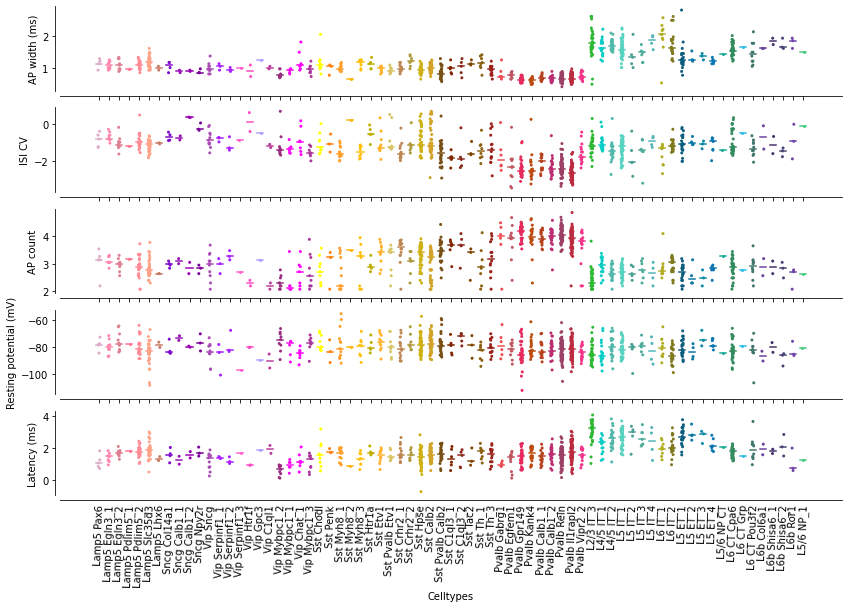

In [46]:
fig, axes = plt.subplots(5, 1, figsize = (14, 9))

for i, (feature, axis) in enumerate(zip(features_to_show, axes.reshape(-1))):
    sns.stripplot(x = 'celltypes', y = feature, data = Xo, palette = cellTypeColors,
                  jitter = True, ax = axis, s = 3, order = ttypes, zorder=0)
    if i==4:
        axis.tick_params(axis='x', which='both', length=0, rotation = 88)
    else:
        axis.set_xlabel('')
        axis.set_xticklabels('')
    sns.despine(ax=axis)
    adjust_spines(axis, ['left', 'bottom'])
    
    for i, ttype in enumerate(ttypes):
        m = np.median(Xo[feature][Xo['celltypes']==ttype])
        axis.plot([i-.3,i+.3], [m,m], zorder=1, color=cellTypeColors[ttype])

axes[0].set_ylabel('AP width (ms)')
axes[3].set_ylabel('Resting potential (mV)')
axes[4].set_ylabel('Latency (ms)')
axes[4].set_xlabel('Celltypes')

plt.savefig('figures/ephys_across_ttypes.pdf', bbox_inches="tight", pad_inches=0)